<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2021

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 4 - AutoEncoder
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4>
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Personal Data

In [1]:
# Set your student number
student_number = 96101902
Name = 'Mohammadreza'
Last_Name = 'Taremi'

# Rules
- You **are** allowed to add or remove cells.
- By running the cell below, you can see if your jupyter file is accepted or not. This cell will also **generate a python file which you'll have to upload to Quera** (as well as your jupyter file). The python file will later be validated and if the code in both files doesn't match, **your Practical Assignment won't be graded**.

In [12]:
! wget https://sut-ai.github.io/resources/problem_sets/rohban_f2021/mini_project/MP4/MPQ4.zip
! unzip MPQ4.zip
! cp -r Practical/Helper_codes .
! rm Theoretical.pdf
! rm -r Practical
! rm MPQ4.zip

--2022-01-11 20:08:37--  https://sut-ai.github.io/resources/problem_sets/rohban_f2021/mini_project/MP4/MPQ4.zip
Resolving sut-ai.github.io (sut-ai.github.io)... 185.199.111.153, 185.199.110.153, 185.199.108.153, ...
Connecting to sut-ai.github.io (sut-ai.github.io)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 311027 (304K) [application/zip]
Saving to: ‘MPQ4.zip’

MPQ4.zip            100%[===================>] 303.74K  --.-KB/s    in 0.02s   

2022-01-11 20:08:37 (16.8 MB/s) - ‘MPQ4.zip’ saved [311027/311027]

Archive:  MPQ4.zip
   creating: Practical/
  inflating: __MACOSX/._Practical    
  inflating: Practical/Q1.ipynb      
  inflating: __MACOSX/Practical/._Q1.ipynb  
  inflating: Practical/Q3.ipynb      
   creating: Practical/Helper_codes/
  inflating: __MACOSX/Practical/._Helper_codes  
  inflating: Practical/Q2.ipynb      
  inflating: __MACOSX/Practical/._Q2.ipynb  
  inflating: Practical/Helper_codes/validator.py  
  inflating: __MAC

In [13]:
# remember to save your jupyter file before running this script
from Helper_codes.validator import *

python_code = extract_python("./Q3.ipynb")
with open(f'python_code_Q3_{student_number}.py', 'w') as file:
    file.write(python_code)

ImportError: ignored

In [14]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Autoencoders (25 Points Extra)

<font size=4>
Author: Ahmad Salimi
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

In this problem, you should implement an autoencoder network, which generates an image presenting the next digit of the input digit. Here are some examples:

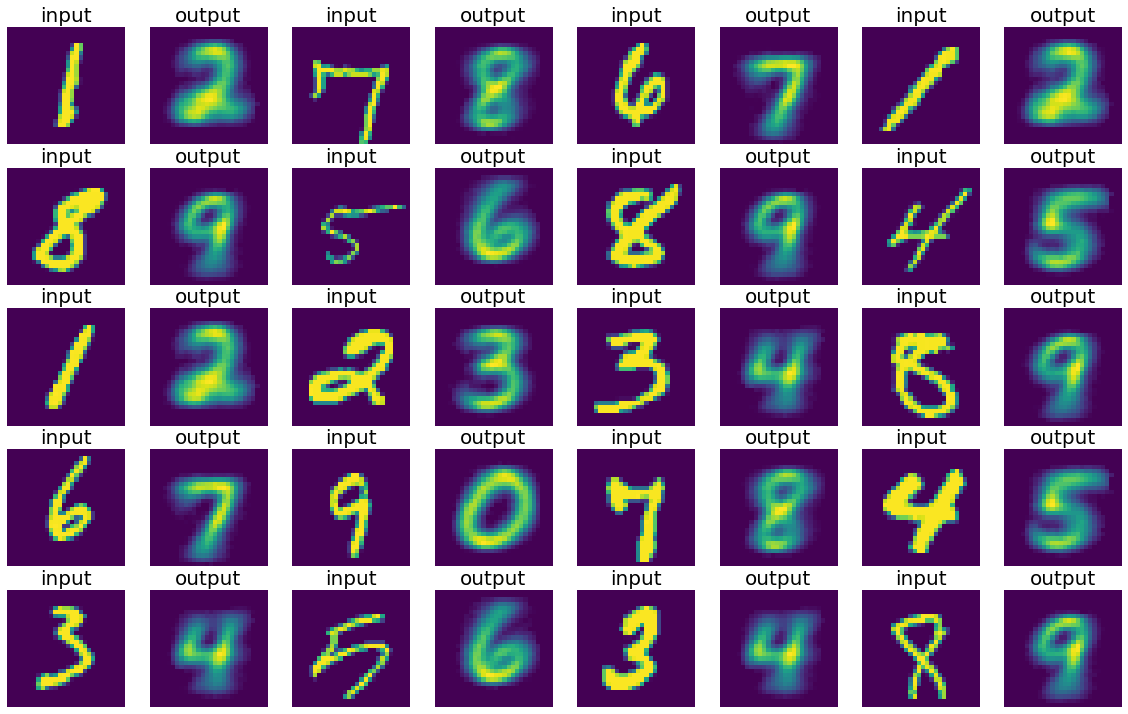

You should use the MNIST dataset, and the ground-truth for each example is provided by a helper function. Make sure to put the `ae_helper.py` file next to this notebook to use the helper function.

## Get the data

Get the data and split them into training, validation, and test sets, by running the following cell. `X` is the input images, `Y` is the ground-truth for each input, and `y` is the input's label.

In [17]:
from ae_helper import get_data
from sklearn.model_selection import train_test_split

X, Y, y = get_data()

X_train, X_test, Y_train, Y_test, y_train, y_test = train_test_split(X, Y, y, test_size=0.2, random_state=17)
X_train, X_val, Y_train, Y_val, y_train, y_val = train_test_split(X_train, Y_train, y_train, test_size=0.1, random_state=17)

## Design your model

Please Implement your autoencoder model below. You MUST implement your model using the `torch` package. The model should input a batch of images and output the generated images for the whole batch. Your model can be consist of fully connected layers (using linear layers), but using fully-convolutional models has extra points.

In [18]:
#### IMPLEMENT YOUR MODEL ####
#This section's code is mostly inspired from medium.com
from torch import nn
import numpy as np

class ConvAutoEnc(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(nn.Conv2d(1, 4, 3, 1, 1),
                                nn.Conv2d(4, 8, 5, 1, 2),
                                nn.Conv2d(8, 16, 5, 1, 2),
                                nn.Tanh(),
                                nn.MaxPool2d(2, 2),
                                nn.Dropout2d(p=0.8),
                                nn.BatchNorm2d(16),
                                nn.Conv2d(16, 16, 5, 1, 3),
                                nn.Conv2d(16, 16, 7, 1, 3),
                                nn.ReLU(),
                                nn.Dropout2d(p=0.8),
                                nn.BatchNorm2d(16),
                                nn.MaxPool2d(2, 2),
                                nn.Conv2d(16, 16, 7, 1, 3),
                                nn.Conv2d(16, 16, 7, 1, 3),
                                nn.Tanh(),
                                nn.Dropout2d(p=0.8),
                                nn.BatchNorm2d(16),
                                nn.AdaptiveMaxPool2d((4, 4)))
        self.conv_transpose = nn.Sequential(nn.ConvTranspose2d(16, 16, 2, 3, 0, 1),
                                            nn.ConvTranspose2d(16, 16, 4, 2, 0, 0),
                                            nn.ConvTranspose2d(16, 8, 3, 1, 0, 0),
                                            nn.ReLU(),
                                            nn.BatchNorm2d(8),
                                            nn.ConvTranspose2d(8, 4, 3, 1, 1, 0),
                                            nn.ConvTranspose2d(4, 2, 3, 1, 1, 0),
                                            nn.ReLU(),
                                            nn.BatchNorm2d(2),
                                            nn.ConvTranspose2d(2, 2, 3, 1, 1, 0),
                                            nn.ConvTranspose2d(2, 1, 3, 1, 1, 0))
    
    def forward(self, x: torch.Tensor):
        x = self.conv(x)
        x = self.conv_transpose(x)
        return x


## The dataset class, and the dataloaders

The following cells implement the dataset class and create the data loaders for training and validation sets. Feel free to modify the batch size for each data loader.

In [19]:
from typing import Tuple
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class MnistNextDigitDataset(Dataset):
    def __init__(self, X: np.ndarray, Y: np.ndarray, y: np.ndarray):
        self.X = torch.from_numpy(X)
        self.Y = torch.from_numpy(Y)
        self.y = torch.from_numpy(y)

    def __len__(self) -> int:
        return self.X.shape[0]

    def __getitem__(self, i: int) -> Tuple[torch.Tensor, ...]:
        return self.X[i], self.Y[i], self.y[i]

In [20]:
train_dataloader = DataLoader(
    MnistNextDigitDataset(X_train, Y_train, y_train),
    batch_size=512,
    shuffle=True
)
val_dataloader = DataLoader(
    MnistNextDigitDataset(X_val, Y_val, y_val),
    batch_size=1024,
    shuffle=False
)

## Instantiate the model and optimizer

Instantiate your model and optimizer in the following cell. Feel free to choose the optimizer and its configurations such as learning rate, decay, etc.

In [21]:
#### INSTANTIATE YOUR MODEL AND OPTIMIZER ####
autoencoder = ConvAutoEnc()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=5e-4)

## Train your autoencoder

Write your training/validation loop in the following cell for an arbitrary number of epochs (until convergence is detected). Make sure to use proper and readable logging containing training and validation metrics for each epoch. Select and store the state dictionary of the best epoch model according to the metrics.

In [25]:
#### IMPLEMENT YOUR TRAIN/VAL LOOP ####
import tqdm

ex = [1, 1, 1, 1, 1, 2, 1, 1, 2, 6]
expected_result = [None for i in range(10)]
for i, y in enumerate(y_train):
    ex[(y + 1) % 10] -= 1
    if ex[(y + 1) % 10] == 0:
        expected_result[(y + 1) % 10] = Y_train[i]

autoencoder.to(device)

num_epochs = 50
for epoch in tqdm.tqdm(range(num_epochs), desc="Epochs"):
    train_loss, val_loss = 0, 0
    best_train_loss = float("inf")

    autoencoder.train()
    with tqdm.tqdm(enumerate(train_dataloader), total=len(train_dataloader), position=0, leave=True) as pbar:
        for i, (X, Y, y) in pbar:
            X = torch.unsqueeze(X, dim=1)
            Y = torch.from_numpy(np.array([expected_result[(label + 1) % 10] for label in y]))
            Y = torch.unsqueeze(Y, dim=1)
            
            X = X.to(device)
            Y = Y.to(device)
            res = autoencoder(X)

            batch_loss = criterion(res, Y)
            train_loss += batch_loss

            pbar.set_description(f"[TRAIN] Loss: {train_loss / (i + 1):.3e}")
            
            batch_loss.backward()
            optimizer.step()
            optimizer.zero_grad()
    
    autoencoder.eval()
    with tqdm.tqdm(enumerate(val_dataloader), total=len(val_dataloader), position=0, leave=True) as pbar:
        for i, (X, Y, y) in pbar:
            X = torch.unsqueeze(X, dim=1)
            Y = torch.from_numpy(np.array([expected_result[(label + 1) % 10] for label in y]))
            Y = torch.unsqueeze(Y, dim=1)

            X = X.to(device)
            Y = Y.to(device)
            res = autoencoder(X)

            batch_loss = criterion(res, Y)
            val_loss += batch_loss

            pbar.set_description(f"[VALID] Loss: {val_loss / (i + 1):.3e}")
    
    if best_train_loss > train_loss:
        torch.save(autoencoder.state_dict(), 'best_train_loss.pth')
        best_train_loss = train_loss

    print(f"\n[Epoch {epoch + 1}]\t"
        f"Train Loss: {train_loss:.4f}\t"
        f"Validation Loss: {val_loss:.4f}")

Epochs:   2%|▏         | 1/50 [00:10<08:38, 10.58s/it]


[Epoch 1]	Train Loss: 5.7475	Validation Loss: 0.3024


Epochs:   4%|▍         | 2/50 [00:21<08:27, 10.57s/it]


[Epoch 2]	Train Loss: 5.6172	Validation Loss: 0.2935


Epochs:   6%|▌         | 3/50 [00:31<08:15, 10.54s/it]


[Epoch 3]	Train Loss: 5.5188	Validation Loss: 0.2898


Epochs:   8%|▊         | 4/50 [00:42<08:05, 10.55s/it]


[Epoch 4]	Train Loss: 5.4059	Validation Loss: 0.2702


Epochs:  10%|█         | 5/50 [00:52<07:54, 10.54s/it]


[Epoch 5]	Train Loss: 5.3181	Validation Loss: 0.2736


Epochs:  12%|█▏        | 6/50 [01:03<07:44, 10.55s/it]


[Epoch 6]	Train Loss: 5.2424	Validation Loss: 0.2577


Epochs:  14%|█▍        | 7/50 [01:13<07:33, 10.55s/it]


[Epoch 7]	Train Loss: 5.1878	Validation Loss: 0.2500


Epochs:  16%|█▌        | 8/50 [01:24<07:22, 10.53s/it]


[Epoch 8]	Train Loss: 5.1162	Validation Loss: 0.2467


Epochs:  18%|█▊        | 9/50 [01:34<07:11, 10.52s/it]


[Epoch 9]	Train Loss: 5.0637	Validation Loss: 0.2405


Epochs:  20%|██        | 10/50 [01:45<07:01, 10.54s/it]


[Epoch 10]	Train Loss: 5.0221	Validation Loss: 0.2374


Epochs:  22%|██▏       | 11/50 [01:55<06:50, 10.53s/it]


[Epoch 11]	Train Loss: 4.9926	Validation Loss: 0.2356


Epochs:  24%|██▍       | 12/50 [02:06<06:39, 10.52s/it]


[Epoch 12]	Train Loss: 4.9400	Validation Loss: 0.2324


Epochs:  26%|██▌       | 13/50 [02:16<06:29, 10.52s/it]


[Epoch 13]	Train Loss: 4.8961	Validation Loss: 0.2273


Epochs:  28%|██▊       | 14/50 [02:27<06:18, 10.52s/it]


[Epoch 14]	Train Loss: 4.8479	Validation Loss: 0.2219


Epochs:  30%|███       | 15/50 [02:37<06:08, 10.52s/it]


[Epoch 15]	Train Loss: 4.8198	Validation Loss: 0.2199


Epochs:  32%|███▏      | 16/50 [02:48<05:57, 10.52s/it]


[Epoch 16]	Train Loss: 4.7943	Validation Loss: 0.2170


Epochs:  34%|███▍      | 17/50 [02:59<05:47, 10.52s/it]


[Epoch 17]	Train Loss: 4.7603	Validation Loss: 0.2129


Epochs:  36%|███▌      | 18/50 [03:09<05:36, 10.52s/it]


[Epoch 18]	Train Loss: 4.7231	Validation Loss: 0.2144


Epochs:  38%|███▊      | 19/50 [03:20<05:26, 10.53s/it]


[Epoch 19]	Train Loss: 4.7069	Validation Loss: 0.2085


Epochs:  40%|████      | 20/50 [03:30<05:15, 10.51s/it]


[Epoch 20]	Train Loss: 4.6690	Validation Loss: 0.2100


Epochs:  42%|████▏     | 21/50 [03:41<05:04, 10.49s/it]


[Epoch 21]	Train Loss: 4.6271	Validation Loss: 0.2041


Epochs:  44%|████▍     | 22/50 [03:51<04:54, 10.51s/it]


[Epoch 22]	Train Loss: 4.5951	Validation Loss: 0.2035


Epochs:  46%|████▌     | 23/50 [04:02<04:44, 10.52s/it]


[Epoch 23]	Train Loss: 4.5651	Validation Loss: 0.2004


Epochs:  48%|████▊     | 24/50 [04:12<04:33, 10.52s/it]


[Epoch 24]	Train Loss: 4.5385	Validation Loss: 0.1971


Epochs:  50%|█████     | 25/50 [04:23<04:23, 10.53s/it]


[Epoch 25]	Train Loss: 4.5126	Validation Loss: 0.1970


Epochs:  52%|█████▏    | 26/50 [04:33<04:12, 10.52s/it]


[Epoch 26]	Train Loss: 4.5106	Validation Loss: 0.1944


Epochs:  54%|█████▍    | 27/50 [04:44<04:02, 10.52s/it]


[Epoch 27]	Train Loss: 4.4761	Validation Loss: 0.1925


Epochs:  56%|█████▌    | 28/50 [04:54<03:51, 10.51s/it]


[Epoch 28]	Train Loss: 4.4597	Validation Loss: 0.1965


Epochs:  58%|█████▊    | 29/50 [05:05<03:41, 10.54s/it]


[Epoch 29]	Train Loss: 4.4445	Validation Loss: 0.1894


Epochs:  60%|██████    | 30/50 [05:15<03:30, 10.53s/it]


[Epoch 30]	Train Loss: 4.4223	Validation Loss: 0.1868


Epochs:  62%|██████▏   | 31/50 [05:26<03:20, 10.53s/it]


[Epoch 31]	Train Loss: 4.4040	Validation Loss: 0.1859


Epochs:  64%|██████▍   | 32/50 [05:36<03:09, 10.53s/it]


[Epoch 32]	Train Loss: 4.3766	Validation Loss: 0.1822


Epochs:  66%|██████▌   | 33/50 [05:47<02:58, 10.52s/it]


[Epoch 33]	Train Loss: 4.3698	Validation Loss: 0.1848


Epochs:  68%|██████▊   | 34/50 [05:57<02:47, 10.50s/it]


[Epoch 34]	Train Loss: 4.3458	Validation Loss: 0.1810


Epochs:  70%|███████   | 35/50 [06:08<02:37, 10.49s/it]


[Epoch 35]	Train Loss: 4.3500	Validation Loss: 0.1796


Epochs:  72%|███████▏  | 36/50 [06:18<02:26, 10.49s/it]


[Epoch 36]	Train Loss: 4.3258	Validation Loss: 0.1801


Epochs:  74%|███████▍  | 37/50 [06:29<02:16, 10.49s/it]


[Epoch 37]	Train Loss: 4.3101	Validation Loss: 0.1775


Epochs:  76%|███████▌  | 38/50 [06:39<02:05, 10.50s/it]


[Epoch 38]	Train Loss: 4.3039	Validation Loss: 0.1791


Epochs:  78%|███████▊  | 39/50 [06:50<01:55, 10.51s/it]


[Epoch 39]	Train Loss: 4.2808	Validation Loss: 0.1787


Epochs:  80%|████████  | 40/50 [07:00<01:45, 10.50s/it]


[Epoch 40]	Train Loss: 4.2649	Validation Loss: 0.1782


Epochs:  82%|████████▏ | 41/50 [07:11<01:34, 10.50s/it]


[Epoch 41]	Train Loss: 4.2481	Validation Loss: 0.1766


Epochs:  84%|████████▍ | 42/50 [07:21<01:24, 10.52s/it]


[Epoch 42]	Train Loss: 4.2371	Validation Loss: 0.1727


Epochs:  86%|████████▌ | 43/50 [07:32<01:13, 10.54s/it]


[Epoch 43]	Train Loss: 4.2327	Validation Loss: 0.1718


Epochs:  88%|████████▊ | 44/50 [07:42<01:03, 10.53s/it]


[Epoch 44]	Train Loss: 4.2176	Validation Loss: 0.1702


Epochs:  90%|█████████ | 45/50 [07:53<00:52, 10.53s/it]


[Epoch 45]	Train Loss: 4.2092	Validation Loss: 0.1701


Epochs:  92%|█████████▏| 46/50 [08:04<00:42, 10.53s/it]


[Epoch 46]	Train Loss: 4.1959	Validation Loss: 0.1694


Epochs:  94%|█████████▍| 47/50 [08:14<00:31, 10.52s/it]


[Epoch 47]	Train Loss: 4.1909	Validation Loss: 0.1707


Epochs:  96%|█████████▌| 48/50 [08:25<00:21, 10.51s/it]


[Epoch 48]	Train Loss: 4.1917	Validation Loss: 0.1679


Epochs:  98%|█████████▊| 49/50 [08:35<00:10, 10.52s/it]


[Epoch 49]	Train Loss: 4.1730	Validation Loss: 0.1669


Epochs: 100%|██████████| 50/50 [08:46<00:00, 10.52s/it]


[Epoch 50]	Train Loss: 4.1592	Validation Loss: 0.1740


## Load the state dictionary of the best epoch

Load the state dictionary of the best epoch model into the model object.

In [26]:
#### LOAD THE BEST EPOCH STATE DICTIONARY ####
autoencoder.load_state_dict(torch.load('best_train_loss.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

## Visualize your model

Select 40 examples from the test set and visualize the input and output of the model for them (See the examples at the beginning of the notebook).

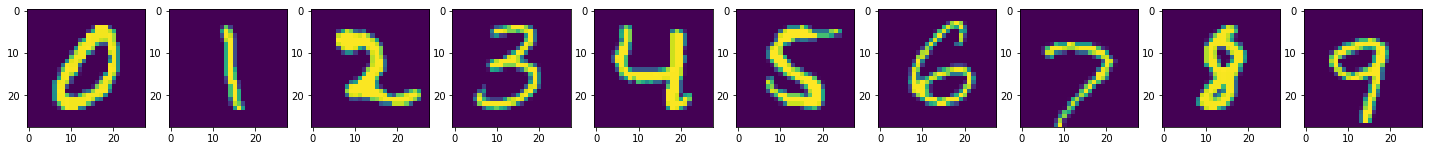

In [27]:
#### VISUALIZE YOUR MODEL ####
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 10, figsize=(25, 5))

ex = [1, 1, 1, 1, 1, 2, 1, 1, 2, 6]
expected_result = [None for i in range(10)]
for i, y in enumerate(y_train):
    ex[(y + 1) % 10] -= 1
    if ex[(y + 1) % 10] == 0:
        expected_result[(y + 1) % 10] = Y_train[i]

for i in range(10):
    ax[i].imshow(expected_result[i])
fig.show()

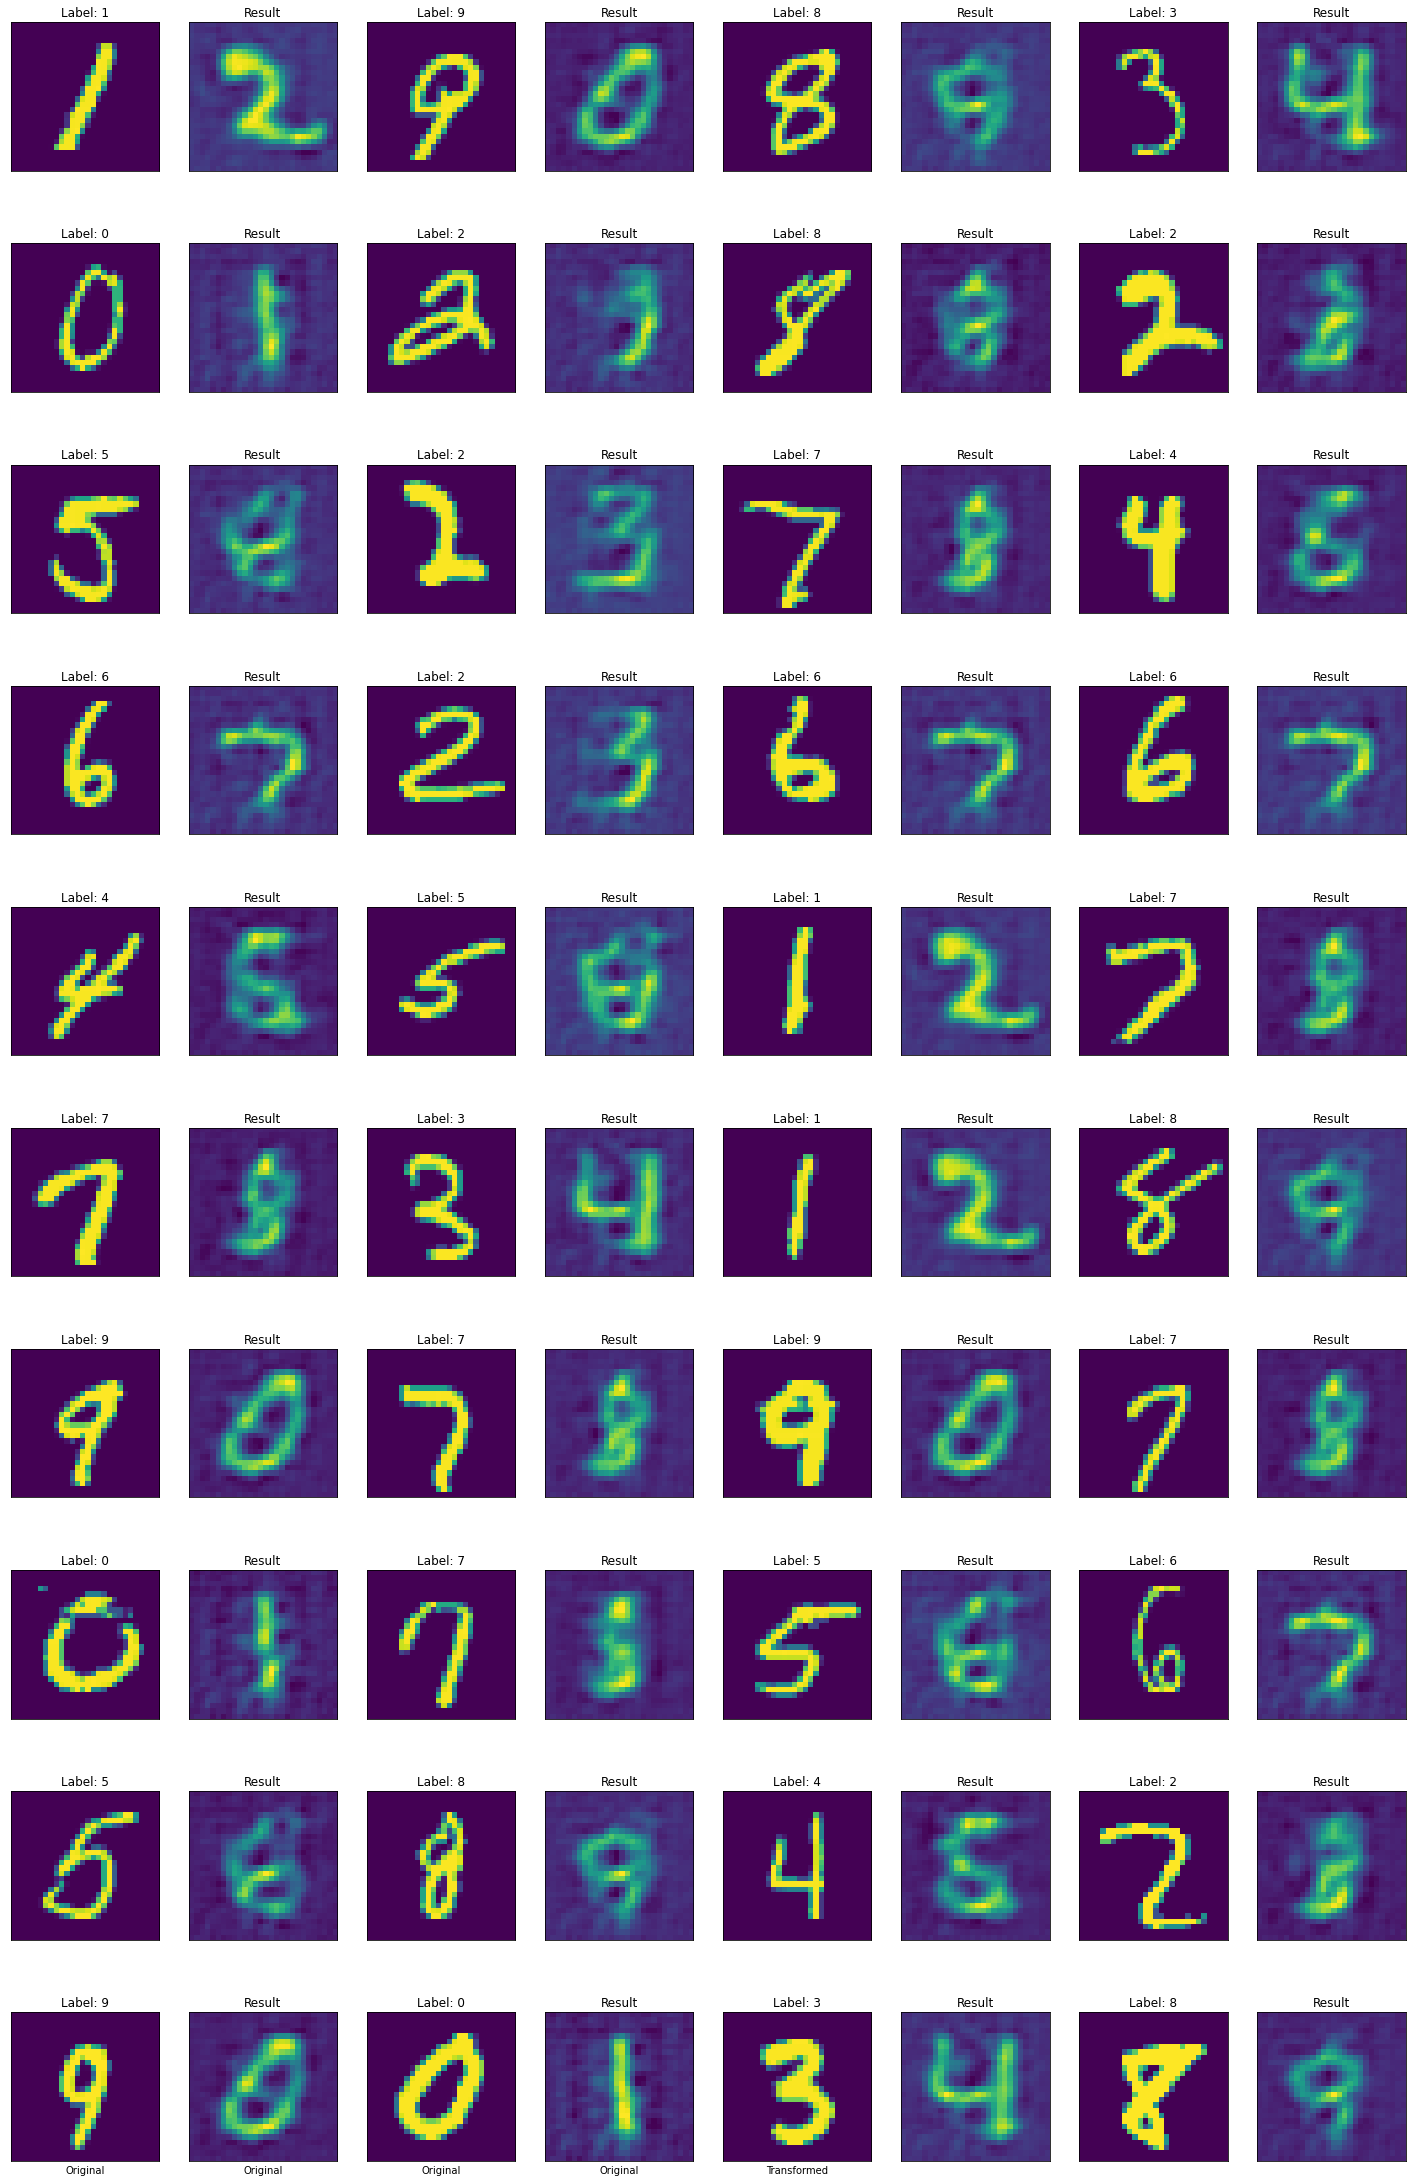

In [28]:
#### VISUALIZE YOUR MODEL ####
import matplotlib.pyplot as plt

num_images = 40

idx = torch.randperm(len(X_test))[:num_images]

fig, ax = plt.subplots(num_images // 4, 8, figsize=(25, 40))

model = autoencoder.cpu()
ptr = 0
for i in range(num_images // 4):
    for j in range(4):
        ax[i, 2 * j].imshow(X_test[ptr])
        ax[i, 2 * j].set_title(f"Label: {y_test[ptr]}")
        res = model(torch.tensor(X_test[ptr])[None, None, :]).detach().numpy()
        ax[i, 2 * j + 1].imshow(res[0][0])
        ax[i, 2 * j + 1].set_title("Result")
        ptr += 1

        ax[i, 2 * j].set_xticks([])
        ax[i, 2 * j].set_yticks([])
        ax[i, 2 * j + 1].set_xticks([])
        ax[i, 2 * j + 1].set_yticks([])
for i in range(4):
    ax[-1, i].set_xlabel("Original")
    ax[-1, i + 1].set_xlabel("Transformed")
plt.show()